In [1]:
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image, ImageOps
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/workspaces/AP-Computer-Science-Principles/Langdats/fashion-mnist.csv')
df_labels = df.pop('label')
X_train, X_test, y_train, y_test = train_test_split(df, df_labels, test_size=0.2)
X_train.shape, X_test.shape


((8000, 784), (2000, 784))

In [5]:
clf = Perceptron(tol=1e-3)
clf.fit(X_train, y_train)
print("Perceptron Accuracy: ", accuracy_score(y_test, clf.predict(X_test)))

Perceptron Accuracy:  0.7975


Iteration 1, loss = 9.51456099
Iteration 2, loss = 3.10509806
Iteration 3, loss = 2.13626090
Iteration 4, loss = 1.49981811
Iteration 5, loss = 1.18468953
Iteration 6, loss = 1.20830843
Iteration 7, loss = 0.90065568
Iteration 8, loss = 0.79711505
Iteration 9, loss = 0.90218546
Iteration 10, loss = 0.63892856
Iteration 11, loss = 0.49841299
Iteration 12, loss = 0.49979105
Iteration 13, loss = 0.45873356
Iteration 14, loss = 0.58220298
Iteration 15, loss = 0.49545665
Iteration 16, loss = 0.40309419
Iteration 17, loss = 0.38301199
Iteration 18, loss = 0.30061050
Iteration 19, loss = 0.31695270
Iteration 20, loss = 0.24901669
Multilayer Perceptron Accuracy:  0.8305


/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


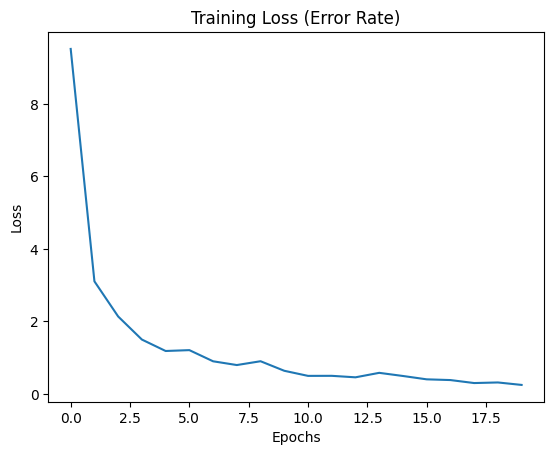

In [7]:
model = MLPClassifier(hidden_layer_sizes=(512,256), max_iter=20, verbose=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Multilayer Perceptron Accuracy: ", accuracy_score(y_test, y_pred))
plt.plot(model.loss_curve_)
plt.title('Training Loss (Error Rate)')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.show()

predicted class:  Sneaker


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


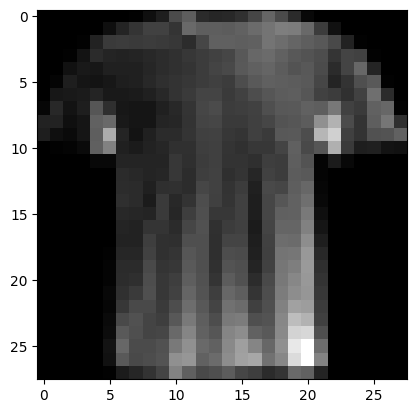

In [11]:
def predict_from_b64(b_str):
    img_data = base64.b64decode(b_str)
    img = Image.open(BytesIO(img_data)).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((28,28))
    img_arr = np.array(img).reshape(-1) /255.0 # flatten and normalize
    return model.predict([img_arr])[0], img

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

b64_str = input("Input the b64 string of the image (bit.ly/b64encode): ")
prediction, image = predict_from_b64(b64_str)
print("predicted class: ", classes[prediction])

plt.imshow(image, cmap='gray')
plt.show()